# NMR Experiment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import seaborn as sb
from numpy import polyfit

In [2]:
def linearfit(x, a, b):
    return a*x + b

## Calibration

In [3]:
datasub = pd.read_excel('NMR.xlsx', sheet_name='calibration')
datasub.head()

,B in mT,I in A
0,10.7,0.05
1,64.6,0.49
2,130.5,1.00
3,197.5,1.50
4,264.0,2.00


parameters: [101.1039784   48.45329583]


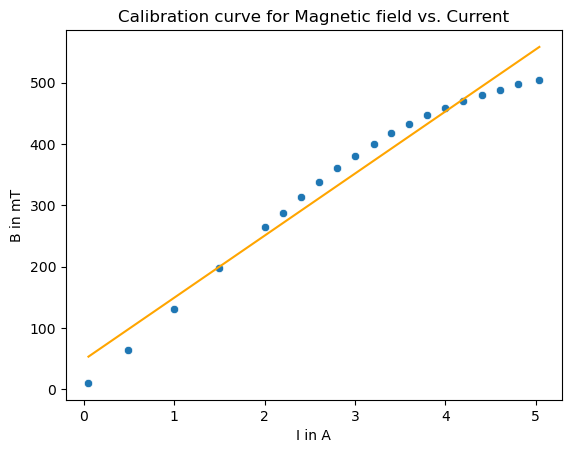

In [4]:
isub = datasub['I in A'].to_numpy()
bsub = datasub['B in mT'].to_numpy()

pfit = polyfit(isub, bsub, 1)
dg = pfit.size-1
isubfit = np.linspace(isub.min(), isub.max(), 100)
print(f'parameters: {pfit}')
calfn = lambda x: sum([pfit.T[i]*x**(dg-i) for i in range(dg+1)])
bsubfit = calfn(isubfit)
sb.scatterplot(data=datasub, x='I in A', y='B in mT')
plt.plot(isubfit, bsubfit, 'orange')
plt.title('Calibration curve for Magnetic field vs. Current')
plt.savefig('nmr_cal', dpi=600)
plt.show()

## 1. Glycerine

In [5]:
df1 = pd.read_excel('NMR.xlsx', sheet_name='glycerine')
display(df1.head())
Ivals = df1['I in A'].to_numpy()
fvals = df1['freq in MHz'].to_numpy()
Bvals = calfn(Ivals)
xsub, ysub = Bvals, fvals

,I in A,freq in MHz,del X FWHM,Y,Y/rt2,del f FWHM,Unnamed: 6,x1,-240
0,3.11,17.5080,360,75.0,53.033009,0.080113,NaN,f1,19.622300
1,3.26,18.1430,400,59.6,42.143564,0.089014,NaN,x2,1.760000
2,3.38,18.5619,320,56.4,39.880822,0.071211,NaN,f2,19.676100
3,3.57,19.1758,400,48.0,33.941125,0.089014,NaN,del f/ del x,0.000223
4,3.74,19.6521,520,43.2,30.547013,0.115718,NaN,NaN,NaN


slope=0.0333789777428949 and intercept=5.476200228982848


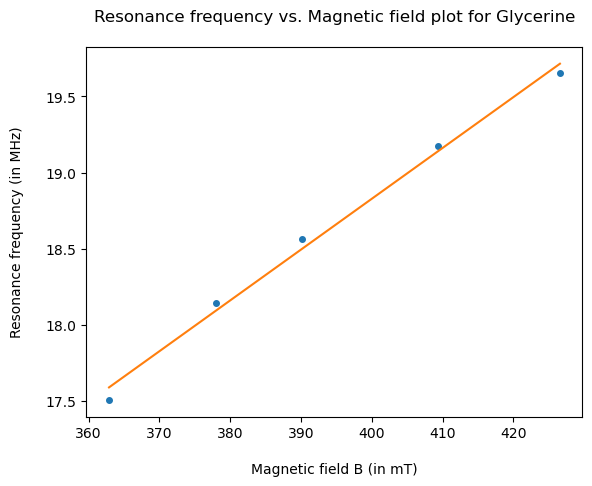

In [6]:
popt, pcov = curve_fit(linearfit, xsub, ysub, p0=[0.05, 2])
xsubfit = np.linspace(xsub.min(), xsub.max(), 100)
ysubfit = popt[0]*xsubfit + popt[1]

print(f'slope={popt[0]} and intercept={popt[1]}')
plt.plot(xsub, ysub, 'o', ms=4)
plt.plot(xsubfit, ysubfit)
plt.title('Resonance frequency vs. Magnetic field plot for Glycerine\n')
plt.xlabel('\nMagnetic field B (in mT)')
plt.ylabel('Resonance frequency (in MHz)\n')
plt.savefig('nmr_1', dpi=600)
plt.show()

## 2 Polystyrene

In [7]:
df1 = pd.read_excel('NMR.xlsx', sheet_name='polystyrene')
display(df1.head())
Ivals = df1['I in A'].to_numpy()
fvals = df1['freq in MHz'].to_numpy()
Bvals = calfn(Ivals)
xsub, ysub = Bvals, fvals

,I in A,freq in MHz,del X FWHM,Y,Y/rt2,del f FWHM,Unnamed: 6,x1,-2.24
0,3.15,17.6405,640,56.0,39.597980,0.306326,NaN,f1,18.068200
1,3.30,18.0398,600,44.4,31.395541,0.287180,NaN,x2,-240.000000
2,3.45,18.6193,520,35.6,25.173001,0.248890,NaN,f2,18.182000
3,3.60,19.2226,640,31.2,22.061732,0.306326,NaN,del f/ del x,0.000479
4,3.75,19.6473,720,31.6,22.344574,0.344616,NaN,NaN,NaN


slope=0.03426439573630034 and intercept=5.02195689039543


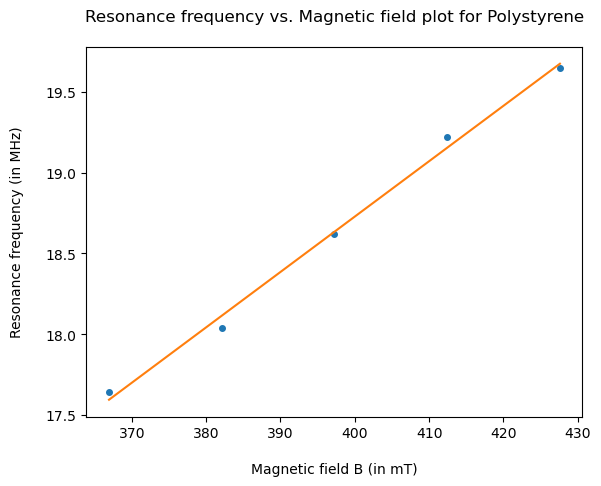

In [8]:
popt, pcov = curve_fit(linearfit, xsub, ysub, p0=[0.05, 2])
xsubfit = np.linspace(xsub.min(), xsub.max(), 100)
ysubfit = popt[0]*xsubfit + popt[1]

print(f'slope={popt[0]} and intercept={popt[1]}')
plt.plot(xsub, ysub, 'o', ms=4)
plt.plot(xsubfit, ysubfit)
plt.title('Resonance frequency vs. Magnetic field plot for Polystyrene\n')
plt.xlabel('\nMagnetic field B (in mT)')
plt.ylabel('Resonance frequency (in MHz)\n')
plt.savefig('nmr_2', dpi=600)
plt.show()

## 3 Polytetrafluoroethylene

In [9]:
df1 = pd.read_excel('NMR.xlsx', sheet_name='polytetrafluoroethylene')
display(df1.head())
Ivals = df1['I in A'].to_numpy()
fvals = df1['freq in MHz'].to_numpy()
Bvals = calfn(Ivals)
xsub, ysub = Bvals, fvals

,I in A,freq in MHz,del X FWHM in mV,Y in mV,Y/rt2,del f FWHM,Unnamed: 6,x1,-2.24,in V
0,3.25,16.9826,360,190.0,134.350288,15.21,NaN,f1,17.33930,NaN
1,3.40,17.3982,320,110.0,77.781746,13.52,NaN,x2,3.76000,in V
2,3.55,17.8879,440,81.0,57.275649,18.59,NaN,f2,17.59280,NaN
3,3.70,18.2681,560,68.4,48.366104,23.66,NaN,del f/ del x,0.04225,NaN
4,3.85,18.7505,440,51.2,36.203867,18.59,NaN,NaN,NaN,NaN


slope=0.029050620647295515 and intercept=6.023038389553612


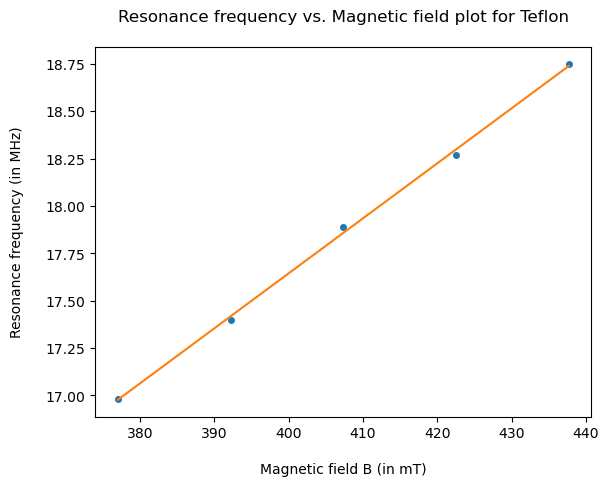

In [10]:
popt, pcov = curve_fit(linearfit, xsub, ysub, p0=[0.05, 2])
xsubfit = np.linspace(xsub.min(), xsub.max(), 100)
ysubfit = popt[0]*xsubfit + popt[1]

print(f'slope={popt[0]} and intercept={popt[1]}')
plt.plot(xsub, ysub, 'o', ms=4)
plt.plot(xsubfit, ysubfit)
plt.title('Resonance frequency vs. Magnetic field plot for Teflon\n')
plt.xlabel('\nMagnetic field B (in mT)')
plt.ylabel('Resonance frequency (in MHz)\n')
plt.savefig('subrata_nmr_3', dpi=600)
plt.show()

## Other Data

In [11]:
xsub = [390.6083, 395.8578, 403.2071, 408.4566]
ysub = [18.32, 18.7, 18.9, 19.14]
xsub, ysub = np.array(xsub), np.array(ysub)

slope=0.043227561477641806 and intercept=1.494186455312194


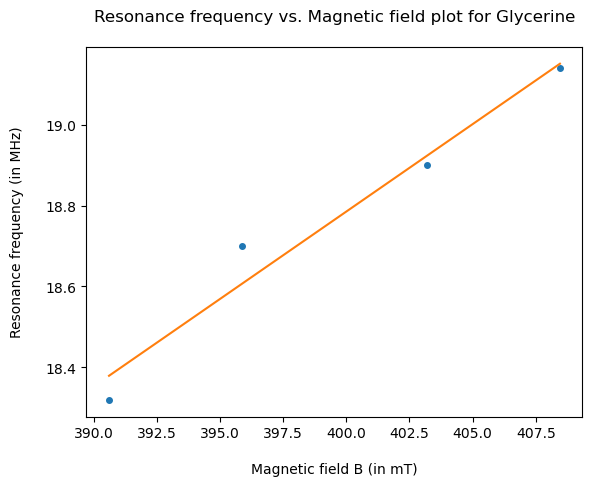

In [12]:
popt, pcov = curve_fit(linearfit, xsub, ysub, p0=[0.05, 2])
xsubfit = np.linspace(xsub.min(), xsub.max(), 100)
ysubfit = popt[0]*xsubfit + popt[1]

print(f'slope={popt[0]} and intercept={popt[1]}')
plt.plot(xsub, ysub, 'o', ms=4)
plt.plot(xsubfit, ysubfit)
plt.title('Resonance frequency vs. Magnetic field plot for Glycerine\n')
plt.xlabel('\nMagnetic field B (in mT)')
plt.ylabel('Resonance frequency (in MHz)\n')
# plt.savefig('subrata_nmr_1', dpi=900)
plt.show()

In [13]:
xsub = [363.3109, 375.9097, 386.4087, 404.257]
ysub = [17.3, 18.1, 18.7, 18.99]
xsub, ysub = np.array(xsub), np.array(ysub)

slope=0.041186310321433155 and intercept=2.5199070229227214


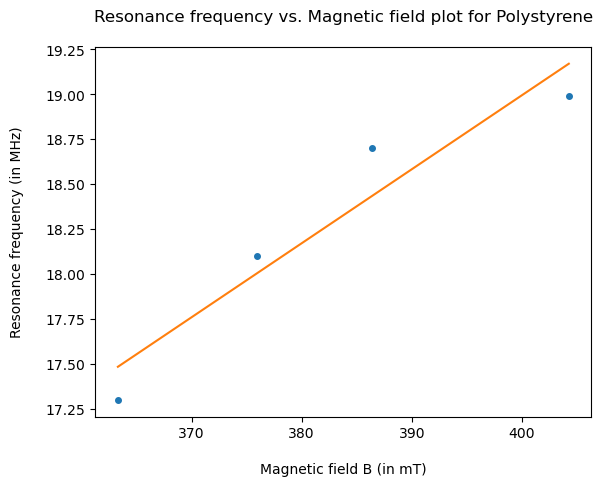

In [14]:
popt, pcov = curve_fit(linearfit, xsub, ysub, p0=[0.05, 2])
xsubfit = np.linspace(xsub.min(), xsub.max(), 100)
ysubfit = popt[0]*xsubfit + popt[1]

print(f'slope={popt[0]} and intercept={popt[1]}')
plt.plot(xsub, ysub, 'o', ms=4)
plt.plot(xsubfit, ysubfit)
plt.title('Resonance frequency vs. Magnetic field plot for Polystyrene\n')
plt.xlabel('\nMagnetic field B (in mT)')
plt.ylabel('Resonance frequency (in MHz)\n')
# plt.savefig('subrata_nmr_2', dpi=900)
plt.show()

In [15]:
xsub = [420.0055, 427.3548, 435.754, 442.0534]
ysub = [18.3, 18.65, 18.97, 19.16]
xsub, ysub = np.array(xsub), np.array(ysub)

slope=0.03900329003570986 and intercept=1.9481959591653804


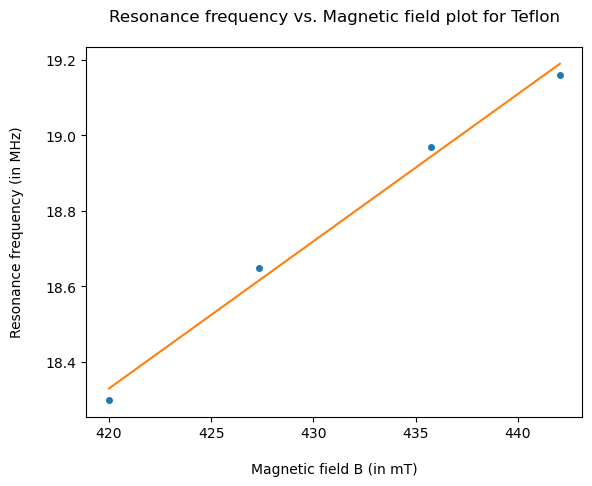

In [16]:
popt, pcov = curve_fit(linearfit, xsub, ysub, p0=[0.05, 2])
xsubfit = np.linspace(xsub.min(), xsub.max(), 100)
ysubfit = popt[0]*xsubfit + popt[1]

print(f'slope={popt[0]} and intercept={popt[1]}')
plt.plot(xsub, ysub, 'o', ms=4)
plt.plot(xsubfit, ysubfit)
plt.title('Resonance frequency vs. Magnetic field plot for Teflon\n')
plt.xlabel('\nMagnetic field B (in mT)')
plt.ylabel('Resonance frequency (in MHz)\n')
# plt.savefig('subrata_nmr_3', dpi=900)
plt.show()

In [17]:
datasub = pd.read_excel('NMRdata.xlsx', sheet_name='sub')
datasub.head()

,Magnetic Field (in mT),Current (in A)
0,12,0.04
1,37,0.25
2,59,0.45
3,81,0.60
4,119,0.88


### B vs I

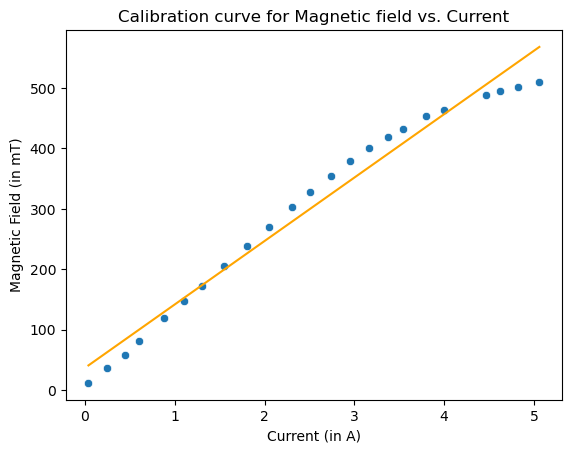

In [18]:
isub = datasub['Current (in A)'].to_numpy()
bsub = datasub['Magnetic Field (in mT)'].to_numpy()

# pfit = polyfit(isub, bsub, 1)
pfit = np.array([104.9861, 36.79192])  # known
# dg = pfit.size-1
isubfit = np.linspace(isub.min(), isub.max(), 100)
# print(f'parameters: {pfit}')
# yfn = lambda x: sum([pfit.T[i]*x**(dg-i) for i in range(dg+1)])
bsubfit = 104.99*isubfit + 36.792
sb.scatterplot(data=datasub, x='Current (in A)', y='Magnetic Field (in mT)')
plt.plot(isubfit, bsubfit, 'orange')
plt.title('Calibration curve for Magnetic field vs. Current')
plt.savefig('subrata_nmr_4', dpi=900)
plt.show()